In [1]:
import numpy as np
import scipy.linalg as spla
import scipy.fftpack as fp
import matplotlib.pyplot as plt
from IPython import display

In [2]:
## Parameters

n_agents = 4 # number of agents
k = 0.1 # K
k_U = -1.5
w_disp = 1. * 1e-3 # w dispersion
#w_disp = 0.

dt = 1. # time step
sim_time = 1000. # sumulation time (in seconds)
n_iterations = int(sim_time / dt)

In [3]:
## Init vals

#ang_speed = w_mul * np.random.rand(n_agents)    # w
#ang_speed = w_mul * np.arange(n_agents) / n_agents
#w_nat = np.random.standard_cauchy(n_agents) * w_disp
w_nat = np.sqrt(w_disp)
theta_0 = 6 * np.pi * np.random.rand(n_agents)    # theta
print(w_nat)
print(theta_0)

0.03162277660168379
[18.69070114 12.80299555  7.50901318  1.5264276 ]


In [4]:
## Adjacency matrix

# assume n_agents = 5
cls1 = np.ones((2, 2))
cls2 = np.ones((2, 2))
adj_background = 0.1 * np.ones((4, 4))
adj = spla.block_diag(cls1, cls2)
print(adj)

[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


In [5]:
## Progress recording

angles = np.zeros((n_agents, n_iterations))
time_vals = np.linspace(1., sim_time, n_iterations)

In [6]:
## Start loop

ang = theta_0
for i in range(n_iterations):
    angles[:, i] = ang
    
    # sum of sins
    ang_mat = np.repeat(ang.reshape(n_agents, 1), n_agents, axis=1)
    diffs = ang_mat.T - ang_mat
    sins = np.sin(diffs)
    sins_adj = np.multiply(sins, adj)
    sums_sins = np.sum(sins, axis=1)
    
    ang = ang + dt * (w_nat + (k / n_agents) * sums_sins + 0 * (k_U) * i / n_iterations)
    #ang = ang + dt * w_nat

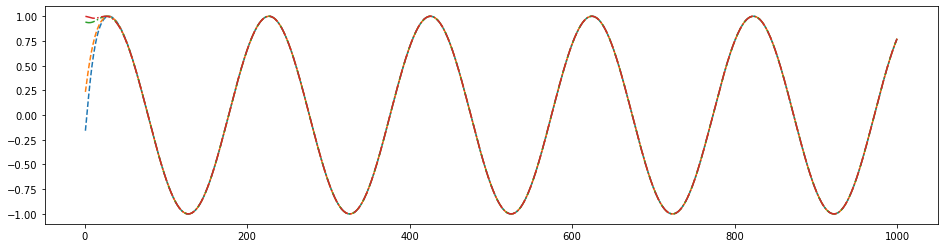

In [7]:
## Plot result

angles_sin = np.sin(angles)
plt.figure(figsize=(16, 4))
for i in range(n_agents // 2):
    plt.plot(time_vals, angles_sin[i], '--')
for i in range(n_agents // 2, n_agents):
    plt.plot(time_vals, angles_sin[i], '-.')
display.clear_output(wait=True)
plt.show()

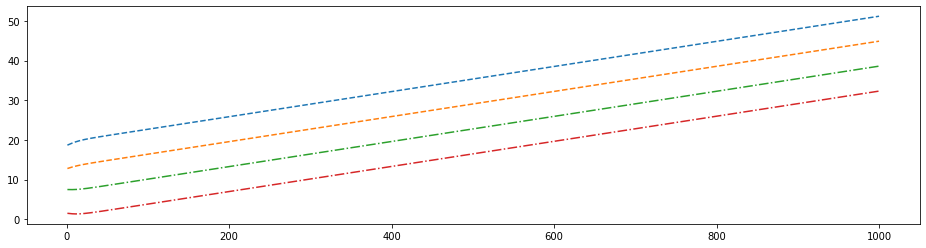

In [8]:
## Plot result

plt.figure(figsize=(16, 4))
for i in range(n_agents // 2):
    plt.plot(time_vals, angles[i], '--')
for i in range(n_agents // 2, n_agents):
    plt.plot(time_vals, angles[i], '-.')
display.clear_output(wait=True)
plt.show()

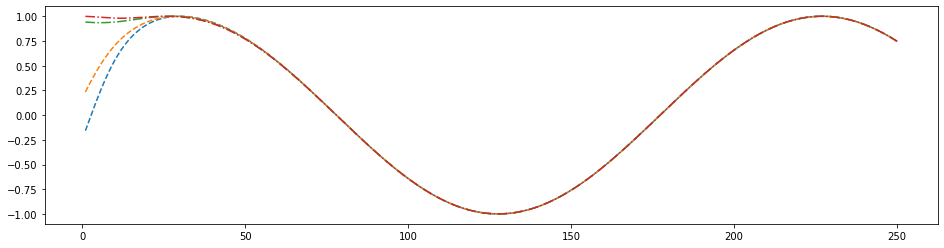

In [9]:
max_perc = 0.25
max_val = int(max_perc * n_iterations)
plt.figure(figsize=(16, 4))
for i in range(n_agents // 2):
    plt.plot(time_vals[0:max_val], angles_sin[i][0:max_val], '--')
for i in range(n_agents // 2, n_agents):
    plt.plot(time_vals[0:max_val], angles_sin[i][0:max_val], '-.')
display.clear_output(wait=True)
plt.show()

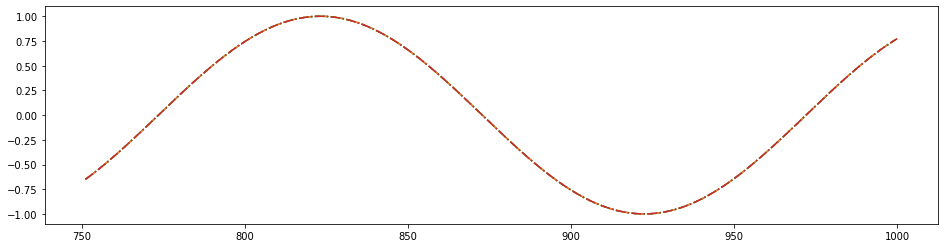

In [10]:
min_perc = 0.75 
min_val = int(min_perc * n_iterations)
plt.figure(figsize=(16, 4))
for i in range(n_agents // 2):
    plt.plot(time_vals[min_val:n_iterations], angles_sin[i][min_val:n_iterations], '--')
for i in range(n_agents // 2, n_agents):
    plt.plot(time_vals[min_val:n_iterations], angles_sin[i][min_val:n_iterations], '-.')
display.clear_output(wait=True)
plt.show()

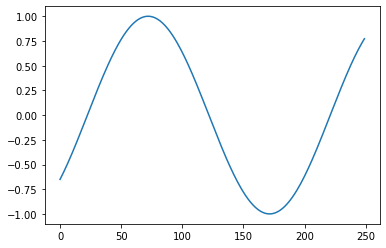

In [11]:
## FFT

sample = angles_sin[0][min_val:n_iterations]
plt.plot(sample)
plt.show()

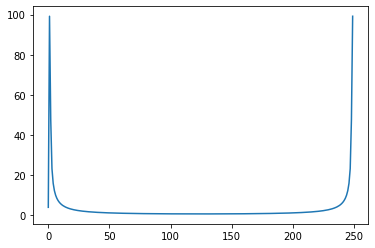

In [12]:
sample_fft = abs(np.fft.fft(sample))
plt.plot(sample_fft)